In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# Load Google Stock Data

In [3]:
goog = pd.read_csv('/Users/blackrose/Downloads/data/Stocks/GOOG.csv')

In [4]:
type(goog)

pandas.core.frame.DataFrame

In [5]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-01,232.129913,255.542160,229.694046,500.126953,249.813644,250106500
1,2007-02-01,252.055237,252.060211,220.692795,448.219421,223.885818,228680500
2,2007-03-01,220.508484,232.129913,217.684067,456.905609,228.224564,237115900
3,2007-04-01,228.025299,245.330444,225.215836,470.089386,234.809875,186612000
4,2007-05-01,235.213364,253.440048,227.850952,496.546753,248.025345,199907700


In [6]:
goog.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
122,2017-03-01,828.849976,853.500000,803.369995,829.559998,829.559998,33835100
123,2017-04-01,829.219971,916.849976,817.020020,905.960022,905.960022,25218700
124,2017-05-01,901.940002,979.270020,901.450012,964.859985,964.859985,32180100
125,2017-06-01,968.950012,988.250000,915.232971,953.400024,953.400024,18226600
126,2017-06-13,951.910034,959.980042,944.089966,953.400024,953.400024,2013337


In [7]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       127 non-null    object 
 1   Open       127 non-null    float64
 2   High       127 non-null    float64
 3   Low        127 non-null    float64
 4   Close      127 non-null    float64
 5   Adj Close  127 non-null    float64
 6   Volume     127 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,127.000000,127.000000,127.000000,127.000000,127.000000,1.270000e+02
mean,417.189203,442.014859,397.459033,629.713788,422.790181,1.184521e+08
std,204.809127,213.741469,201.429919,179.924524,209.901311,8.320530e+07
min,142.804733,164.134781,123.188263,292.157898,145.933014,2.013337e+06
25%,260.291870,277.509827,242.456215,522.764740,261.890870,4.725025e+07
50%,319.188599,343.208557,298.381592,581.403809,321.744019,1.028728e+08
75%,558.087769,583.293579,532.951782,742.774994,558.309784,1.571482e+08
max,968.950012,988.250000,944.089966,1212.321655,964.859985,4.000830e+08


In [9]:
goog.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
goog[['Date','Low','High']]

,Date,Low,High
0,2007-01-01,229.694046,255.542160
1,2007-02-01,220.692795,252.060211
2,2007-03-01,217.684067,232.129913
3,2007-04-01,225.215836,245.330444
4,2007-05-01,227.850952,253.440048
...,...,...,...
122,2017-03-01,803.369995,853.500000
123,2017-04-01,817.020020,916.849976
124,2017-05-01,901.450012,979.270020
125,2017-06-01,915.232971,988.250000


In [11]:
goog.rename(columns={'Adj Close' : 'Goog'},inplace =True)

In [12]:
goog.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Goog', 'Volume'], dtype='object')

In [13]:
goog = goog[['Date','Goog']]

In [14]:
goog.columns

Index(['Date', 'Goog'], dtype='object')

In [16]:
sp500 = pd.read_csv('/Users/blackrose/Downloads/data/Stocks/SP_500.csv', usecols=[5])

In [17]:
sp500.head()

,Adj Close
0,1438.239990
1,1406.819946
2,1420.859985
3,1482.369995
4,1530.619995


In [18]:
goog['SP500'] = sp500['Adj Close']

In [19]:
goog.head()

,Date,Goog,SP500
0,2007-01-01,249.813644,1438.239990
1,2007-02-01,223.885818,1406.819946
2,2007-03-01,228.224564,1420.859985
3,2007-04-01,234.809875,1482.369995
4,2007-05-01,248.025345,1530.619995


In [20]:
(228.224564 - 	223.885818) / 223.885818

0.019379280200767277

In [ ]:
data = goog[['Goog','SP500']].pct_change() # ทำการคำนวณ เปอร์เซ็นต์การเปลี่ยนแปลง (percentage change) ของข้อมูลในคอลัมน์ 'Goog' และ 'SP500' ใน DataFrame goog โดยใช้ฟังก์ชัน pct_change().

In [22]:
data.head()

,Goog,SP500
0,NaN,NaN
1,-0.103789,-0.021846
2,0.019379,0.009980
3,0.028855,0.043291
4,0.056282,0.032549


In [23]:
goog.shape

(127, 3)

In [ ]:
x_data = data['Goog'].values[1:]    # เลือกทุกแถว (row) ยกเว้นแถวแรก จากคอลัมน์ 'Goog' 
y_data =data['SP500'].values[1:]

In [30]:
data

,Goog,SP500
0,NaN,NaN
1,-0.103789,-0.021846
2,0.019379,0.009980
3,0.028855,0.043291
4,0.056282,0.032549
...,...,...
122,0.007714,-0.000389
123,0.092097,0.009091
124,0.065014,0.011576
125,-0.011877,0.007293


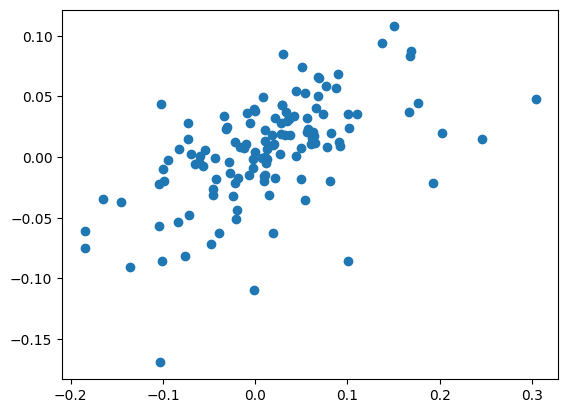

In [31]:
plt.scatter(x_data, y_data)

# Linear Regresion model on Stock Data

In [32]:
m = tf.Variable(tf.random_uniform([]))
b = tf.Variable(tf.random_uniform([]))

In [33]:
x_pl = tf.placeholder(tf.float32)
y_pl = tf.placeholder(tf.float32)

In [36]:
model = m * x_pl + b

In [37]:
loss = tf.reduce_mean(tf.square(model - y_pl)) #  Mean Squared Error

In [40]:
learning_rate = 0.01

In [41]:
Adam = tf.train.AdamOptimizer(learning_rate)

In [42]:
optimizer = Adam.minimize(loss)

In [43]:
epochs = 500

In [44]:
init = tf.global_variables_initializer() # tf.train.AdamOptimizer: คือ optimizer ที่ใช้วิธีการ gradient descent + momentum + adaptive learning rate 
# เพื่อให้อัปเดตโมเดลได้เร็วและเสถียรกว่า optimizer ทั่วไป เช่น GradientDescentOptimizer.

In [45]:
losses = []
m_list = []
b_list = []

In [ ]:
with tf.Session() as sess:
    # รันตัว initializer (เช่น การกำหนดค่าเริ่มต้นให้กับ m, b)
    sess.run(init)
    
    # ในแต่ละ epoch จะอัปเดตค่าของ m และ b
    for epoch in range(epochs):
        # ใช้ optimizer เพื่อ ลดค่า loss โดยใช้ x_data และ y_data ที่ใส่ผ่าน feed_dict
        sess.run(optimizer, feed_dict ={x_pl:x_data,y_pl:y_data})
        if epoch % 10 == 0: # แสดงค่า loss ทุก ๆ 10 รอบ:
            _loss = sess.run(loss,feed_dict={x_pl:x_data,y_pl:y_data})
            print('epoch',epoch,',loss',loss)
            losses.append(_loss)
            
            # คือการ "ดึงค่าจริง" ของตัวแปร m, b ออกมาจาก TensorFlow
            _m,_b = sess.run([m,b])
            print('slope:',_m,',intercept:',_b)
            m_list.append(_m)
            b_list.append(_b)
    m_final,b_final,loss_final = sess.run([m,b,loss],feed_dict={x_pl:x_data,y_pl:y_data})

epoch 0 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.9107806 ,intercept: 0.37031353
epoch 10 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.81189096 ,intercept: 0.27170584
epoch 20 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.7184914 ,intercept: 0.18020797
epoch 30 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.6354972 ,intercept: 0.10273832
epoch 40 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.5665715 ,intercept: 0.04487996
epoch 50 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.51293445 ,intercept: 0.008612949
epoch 60 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.4730678 ,intercept: -0.008612161
epoch 70 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.44356441 ,intercept: -0.012568051
epoch 80 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.4205995 ,intercept: -0.009705614
epoch 90 ,loss Tensor("Mean:0", shape=(), dtype=float32)
slope: 0.4011729 ,intercept: -0.0050595137
epoch 100 ,loss Te

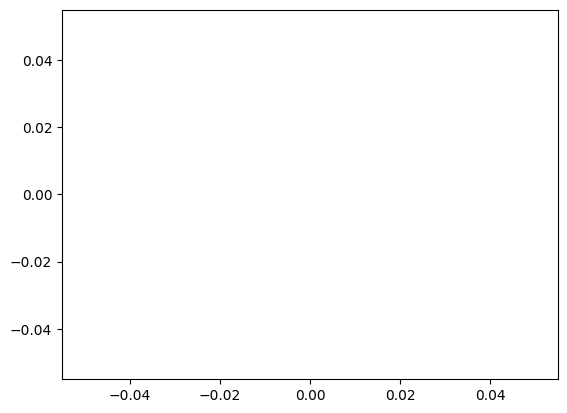

In [46]:
plt.plot(losses)

IndexError: list index out of range

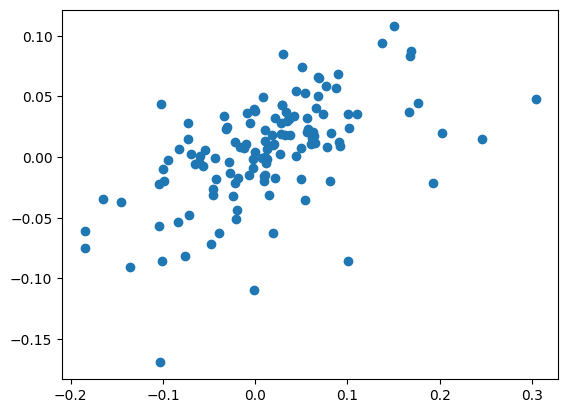

In [47]:
plt.scatter(x_data, y_data)
plt.plot(x_data , x_data * m_list[0] + b_list[0], 'y-')
plt.plot(x_data , x_data * m_list[1] + b_list[1], 'g-')
plt.plot(x_data , x_data * m_final + b_final , 'r-')